In [112]:
# Esta linea nos sirve para que los gráficos sean interactivos
# Dependiendo de su configuración puede ser necesaria o no
%matplotlib notebook
# Importamos la librería de robótica y le designamos el alias "rtb"
import roboticstoolbox as rtb
# Para manejar los ángulos, que la librería trabaja en radianes
from math import pi, inf

In [113]:
# Designo las longitudes de brazo
l1 = 3
l2 = 2

In [114]:
# Definimos el primer eslabón, sólo pasamos el parámetro a porque es el único no nulo 
# Ademas le pasamos el parametro qlim para limitar el giro
L1 = rtb.RevoluteDH(a=l1, qlim=[-pi/2, pi/2])
L1

RevoluteDH(d=0, a=3, ⍺=0, qlim=[-1.57, 1.57], m=0, Jm=0, B=0, G=0)

In [115]:
# Lo mismo con el segundo eslabón
L2 = rtb.RevoluteDH(a=l2)
L2

RevoluteDH(d=0, a=2, ⍺=0, m=0, Jm=0, B=0, G=0)

In [116]:
# Finalmente, creamos el robot uniendo los eslabones recién creados
# Observar que, como a un eslabon le estableci limites, 
# todos los eslabones establecen su lìmite en -pi, +pi (360º)
robot = rtb.DHRobot([L1,L2])
robot

DHRobot: noname, 2 joints (RR), dynamics, standard DH parameters
┏━━━━┳━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃θⱼ  ┃ dⱼ ┃ aⱼ ┃  ⍺ⱼ  ┃   q⁻    ┃   q⁺   ┃
┣━━━━╋━━━━╋━━━━╋━━━━━━╋━━━━━━━━━╋━━━━━━━━┫
┃ q1 ┃  0 ┃  3 ┃ 0.0° ┃  -90.0° ┃  90.0° ┃
┃ q2 ┃  0 ┃  2 ┃ 0.0° ┃ -180.0° ┃ 180.0° ┃
┗━━━━┻━━━━┻━━━━┻━━━━━━┻━━━━━━━━━┻━━━━━━━━┛

In [117]:
# Añadimos el primer punto para el robot,
# en este caso, sus dos ejes en cero.
robot.addconfiguration('zero',[0,0])
robot.zero

array([0., 0.])

In [118]:
# Añadimos otro punto.
# Ahora, los giros son relativos 
robot.addconfiguration('t1',[pi/2,pi/4])
robot.t1

array([1.57079633, 0.78539816])

<IPython.core.display.Javascript object>


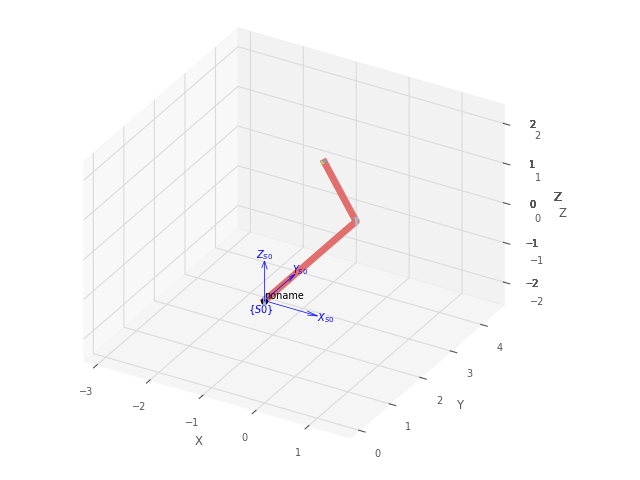

PyPlot3D backend, t = 0.05, scene:
  noname

In [119]:
robot.plot(robot.t1)

In [123]:
# Importamos la libreria spatialmath, para poder plotear ternas en el mismo grafico
from spatialmath import *
from spatialmath.base import *

In [124]:
S0 = SE3()

In [145]:
# Ploteamos todo junto
robot.plot(robot.t1, block = False)
trplot(S0.A, frame='S0', block = False)
angulo_q1_pos_t1 = robot.t1[0]
S1 = L1.A(q=pi/2)
print(angulo_q1_pos_t1)
trplot(S1, frame = 'S1')

1.5707963267948966


RecursionError: maximum recursion depth exceeded while calling a Python object

In [132]:
robot.t1[0]

1.5707963267948966

In [140]:
L1.A(q=robot.t1[0])

   0        -1         0         0         
   1         0         0         3         
   0         0         1         0         
   0         0         0         1         


In [143]:
S1

NameError: name 'S1' is not defined